*****************************************************************
#  Research paper
- Authors: Paul Koks, Izzie He, Lisanne van Vliet, Sam Slotemaker
- TAs: Sandro Barres-Hamers, Alexander Schmatz, Márton Bodó and Danae Mitsea.
*****************************************************************

## Installing the needed packages
The following 2 cells install and import the needed packages


In [ ]:
!pip install nltk
!pip install scipy

In [4]:
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import numpy as np

## Store all comments from the CSV files with their corresponding movie ID
This cell gets all data from the comment CSVs and puts it inside a map by its movie ID, so it can later be easily extracted

In [18]:
import csv
import os

directory = 'datasets/comments'
comments_by_movie_id = {}
# all fileNames must be [movieId].csv, where movieId is the ID from the dataset row, to make this work
files_parsed = 0
for filename in os.listdir(directory):
    if filename.endswith('.csv'): 
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            csv_reader = csv.DictReader(file)
            data = [row for row in csv_reader]
            fileName = filename.split('.')[0];
            comments_by_movie_id[fileName] = data
            files_parsed += 1

print(f"All comments are parsed from {files_parsed} files and are stored inside the comments_by_movie_id variable!")

All comments are parsed from 40 files and are stored inside the comments_by_movie_id variable!


## Store the average sentiment of the trailer comments
This cell will analyse all comments and store their sentiment score

In [22]:
from collections import Counter
sid = SentimentIntensityAnalyzer()

sentiment_by_movie_id = {}

for movieId, comments in comments_by_movie_id.items():
    sentiment_total = 0
    for comment in comments:
        sentence = comment['text']
        ss = sid.polarity_scores(sentence)
        sentiment_total += ss['compound']
        average_sentiment = 0;

    # some comment files are broken so added this check to not break the code
    if len(comments) != 0:
        average_sentiment = sentiment_total / len(comments)
    else: 
        print('no comments found for:')
        print(movieId)
        
    sentiment_by_movie_id[movieId] = average_sentiment

print("All sentiments are analysed and stored inside the sentiment_by_movie_id variable!")

no comments found for:
739405
no comments found for:
840326
All sentiments are analysed and stored inside the sentiment_by_movie_id variable!


## Analysis
The cell below takes our 40 movies, then, for every movie it plots it against the trailer score number 

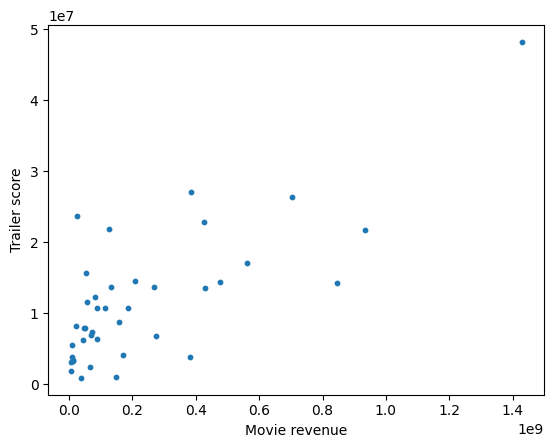

In [27]:
with open('datasets/40MoviesDataSet.csv', 'r') as file:
    csv_reader = csv.DictReader(file)
    movie_data = [row for row in csv_reader]

def getTrailerScore(movie):
    sentimentScore = sentiment_by_movie_id[movie['id']]
    viewCount = int(movie['viewCount'])
    return sentimentScore * viewCount

def getMovieBoxOffice(movie):
    return int(movie['revenue'])

box_office = [getMovieBoxOffice(movie) for movie in movie_data]
trailer_score = [getTrailerScore(movie) for movie in movie_data]

plt.scatter(box_office, trailer_score, s=10)

plt.xlabel("Movie revenue")
plt.ylabel("Trailer score")

plt.show()

### Correlation
The cell below takes the movie box office & trailer score and checks if there is a correlation between the two

In [28]:
from scipy.stats import pearsonr

corr, _ = pearsonr(box_office, trailer_score)
print(f"correlation number is {corr}.")

correlation number is 0.7500225383392957.
